In [21]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [22]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Entropy/CSV/Laplacian.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-22-225eef3572c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-22-225eef3572c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.114438,0.140184,0.117099,0.090462,0.061536,0.058827,0.076523,0.054710,0.051101,0.161849,...,0.057461,0.026434,0.038884,0.604908,0.381741,0.114864,0.085328,0.094948,0.097022,1
1,0.348783,0.457155,0.459225,0.368381,0.425025,0.400959,0.208270,0.233481,0.247873,0.207251,...,0.198511,0.219586,0.195566,0.267384,0.219364,0.177270,0.222399,0.173094,0.169770,1
2,1.192100,1.171016,1.308730,1.353133,1.401836,1.401335,1.299708,1.205565,1.228056,1.338457,...,1.212109,0.861883,0.772912,1.001028,1.327866,1.037109,0.764830,0.846871,1.206934,1
3,0.838410,0.703969,1.290861,1.205247,0.716265,0.363922,0.347208,0.781451,0.814710,0.252073,...,0.280406,0.054998,0.039085,0.729423,0.794296,0.565316,0.185258,0.178586,0.132766,1
4,0.966680,1.013764,0.859604,0.731158,0.618052,0.513335,0.365159,0.393421,0.775395,0.632960,...,0.465689,0.491000,0.459163,0.601426,0.855205,0.742445,0.654155,0.455056,0.382461,1


In [23]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

In [24]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7163120567375887
              precision    recall  f1-score   support

          -1       0.77      0.86      0.81       101
           1       0.50      0.35      0.41        40

    accuracy                           0.72       141
   macro avg       0.63      0.61      0.61       141
weighted avg       0.69      0.72      0.70       141



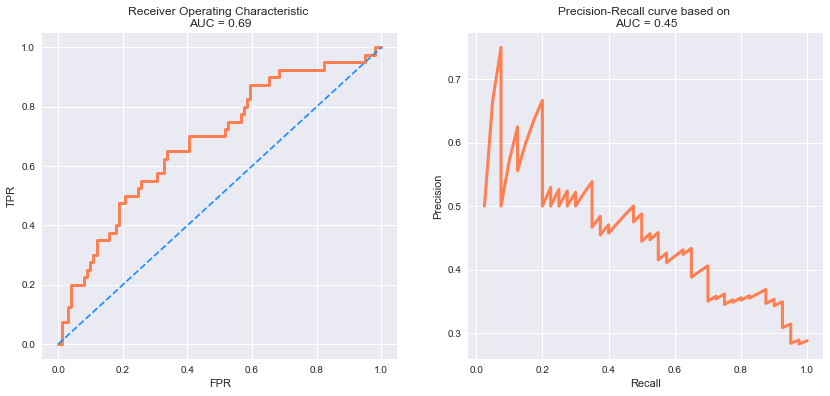

In [25]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()